Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
''' train_ds have totle 2239
    test_ds have totle 118 files 
    totle =2357 files , and train and test have 9 classe 
'''

' train_ds have totle 2239\n    test_ds have totle 118 files \n    totle =2357 files , and train and test have 9 classe \n'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Create a dataset

Define some parameters for the loader:

In [3]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

Use 80% of the images for training, and 20% for validation.

In [4]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\\Users\\user\\OneDrive\\Desktop\\Deep Learning\\Project\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 2239 files belonging to 9 classes.


In [5]:
len(train_ds)

70

The totle files is 2239 and btach_size is 32 

totole_batch = (2239/32) ~ 70

its mean 70 iteration 

In [6]:
# train dataset belong classe name 
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
# test_data 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\\Users\\user\\OneDrive\\Desktop\\Deep Learning\\Project\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 118 files belonging to 9 classes.


The totle files is 118 and btach_size is 32

totole_batch = (118/32) ~ 4

its mean 4 iteration

In [8]:
len(val_ds)

4

In [9]:
# test dataset belong classe name 
val_ds.class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [10]:
# this is tensore form because multidimension data 
val_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# convert simple form 
# fetch 1 batch , 1 batch have 32 files  
for image_batch , lable_batch in val_ds.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('this is lable shape :',lable_batch.shape)


this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [12]:
# normal formn 
for image_batch , label_batch in train_ds.take(1):
    print(image_batch.numpy())
    print('\n')
    print('convergt the lable in numeric : ',label_batch.numpy())

[[[[192.       170.       157.      ]
   [192.       170.       157.      ]
   [192.05556  170.05556  157.05556 ]
   ...
   [195.       171.       159.      ]
   [197.       173.       163.      ]
   [197.       173.       163.      ]]

  [[192.       170.       157.      ]
   [192.       170.       157.      ]
   [192.05556  170.05556  157.05556 ]
   ...
   [195.       171.       159.      ]
   [197.       173.       163.      ]
   [197.       173.       163.      ]]

  [[191.       169.       156.      ]
   [193.       171.       158.      ]
   [191.       169.       156.      ]
   ...
   [195.       171.       159.      ]
   [195.       171.       161.      ]
   [194.275    170.275    160.275   ]]

  ...

  [[191.38351  171.38351  160.38351 ]
   [194.18842  174.18842  163.18842 ]
   [193.       173.       162.      ]
   ...
   [181.94446  157.94446  145.94446 ]
   [187.       159.       148.      ]
   [187.       159.       148.      ]]

  [[191.       171.       160.      ]
   [191

In [13]:

# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These class_names = orrespond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

(32, 180, 180, 3)
[3 1 4 4 5 5 5 2 8 5 1 4 4 4 7 1 5 3 5 8 7 5 7 5 1 4 1 6 7 5 7 4]


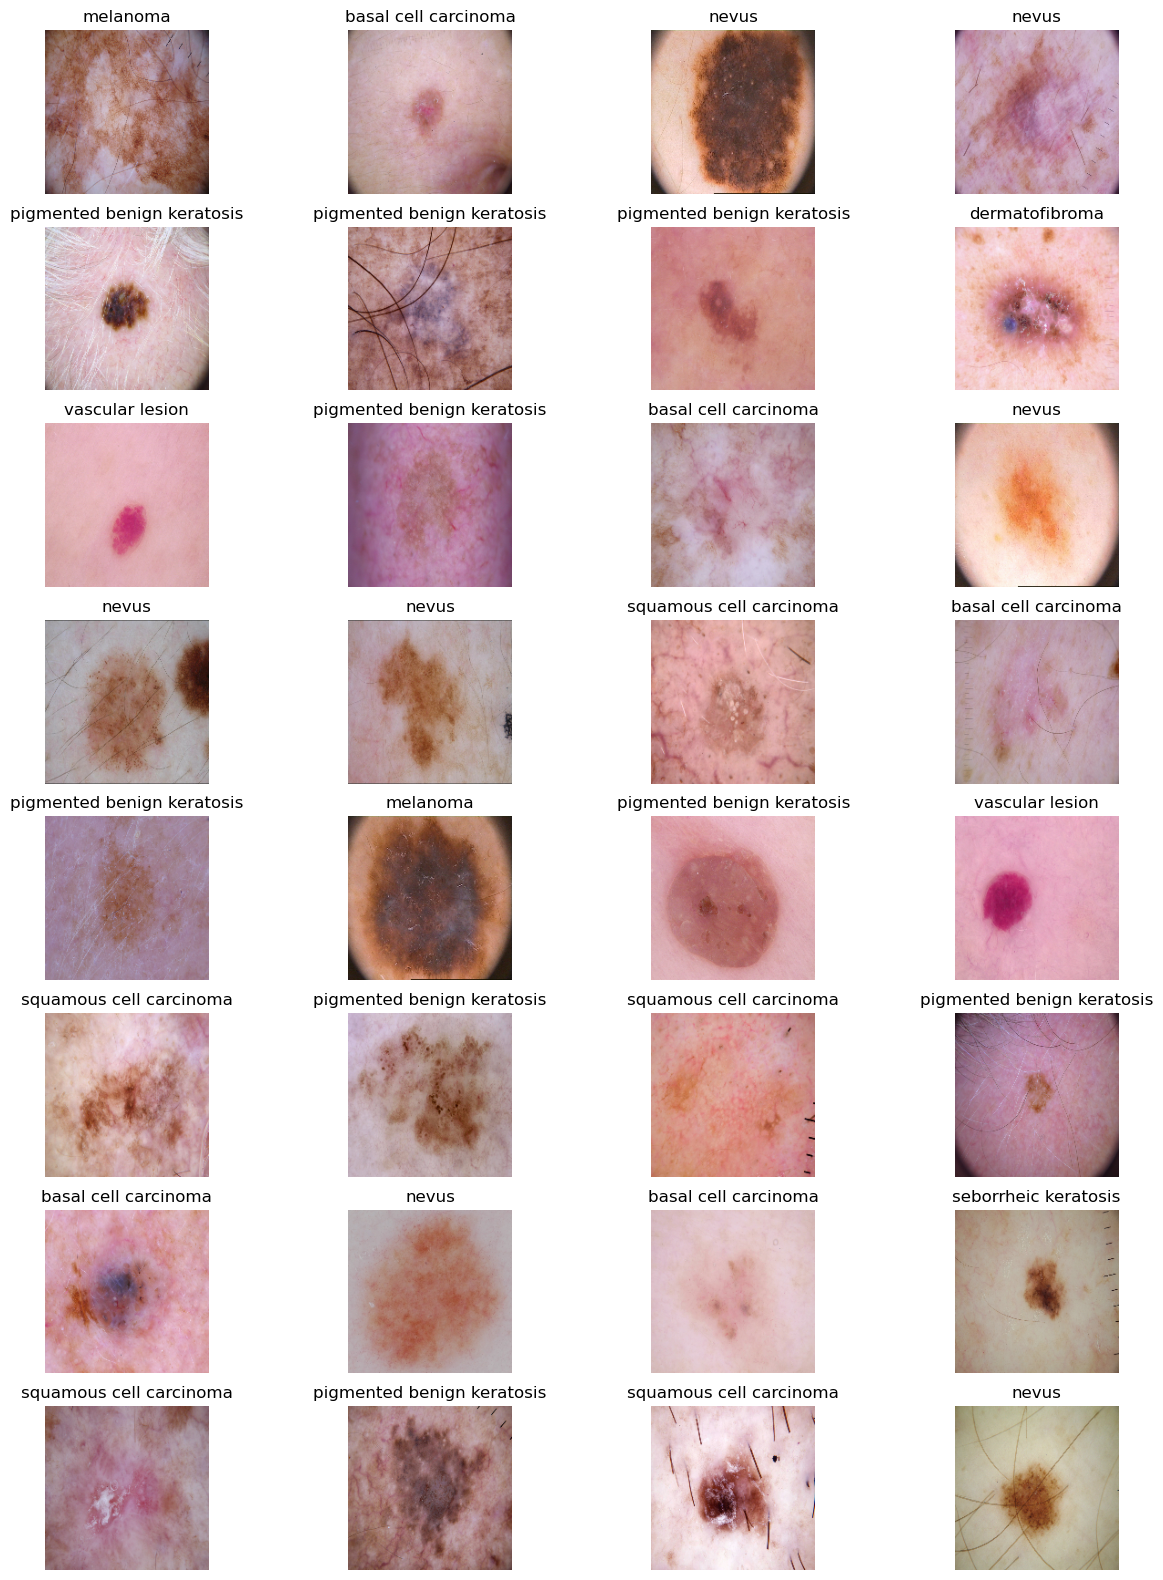

In [14]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
# incress the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [17]:
# resize and rescale the value 
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
# data augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [20]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

In [21]:
input_shape = (batch_size , img_height , img_width , channels)

In [34]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [35]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.build(input_shape)

In [37]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (32, 180, 180, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (32, 180, 180, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 90, 90, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 90, 90, 64)          36928     
                                                      

### Train the model

In [38]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
70/70 [==============================] - 170s 2s/step - loss: 2.0418 - accuracy: 0.2099 - val_loss: 2.1368 - val_accuracy: 0.2203
Epoch 2/5
70/70 [==============================] - 163s 2s/step - loss: 1.7312 - accuracy: 0.3671 - val_loss: 2.0937 - val_accuracy: 0.2373
Epoch 3/5
70/70 [==============================] - 165s 2s/step - loss: 1.6390 - accuracy: 0.4015 - val_loss: 2.1337 - val_accuracy: 0.3305
Epoch 4/5
70/70 [==============================] - 162s 2s/step - loss: 1.5440 - accuracy: 0.4573 - val_loss: 1.9169 - val_accuracy: 0.3475
Epoch 5/5
70/70 [==============================] - 165s 2s/step - loss: 1.4787 - accuracy: 0.4833 - val_loss: 2.0865 - val_accuracy: 0.3729


In [39]:
# accuracy of model each epochs
history.history['accuracy']

[0.2099151462316513,
 0.3671281933784485,
 0.4015185236930847,
 0.45734703540802,
 0.4832514524459839]

In [40]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.22033898532390594,
 0.23728813230991364,
 0.3305084705352783,
 0.347457617521286,
 0.37288135290145874]

In [41]:
# lost
history.history['loss']

[2.0418248176574707,
 1.7312301397323608,
 1.6389880180358887,
 1.5440226793289185,
 1.478682041168213]

### Visualizing training results

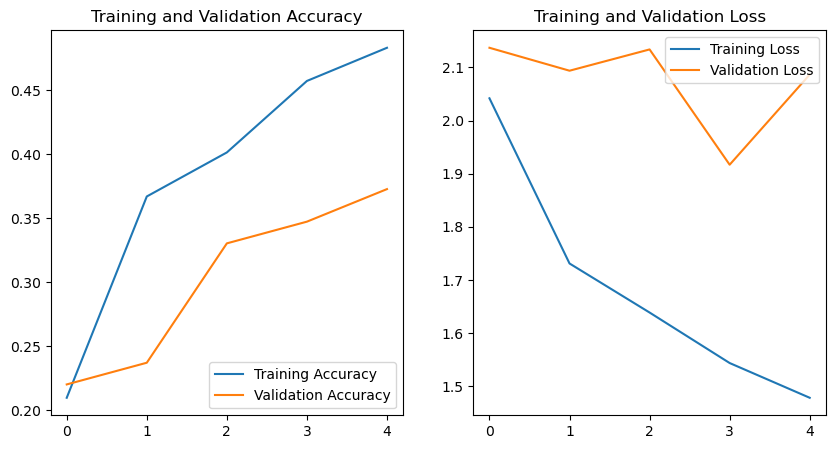

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
`Traning-accuracy = 48` and 

`validation-accuracy = 37` 

this is underfit model not good acurracy of traning and validation dataset 

### Write your findings here

In [45]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

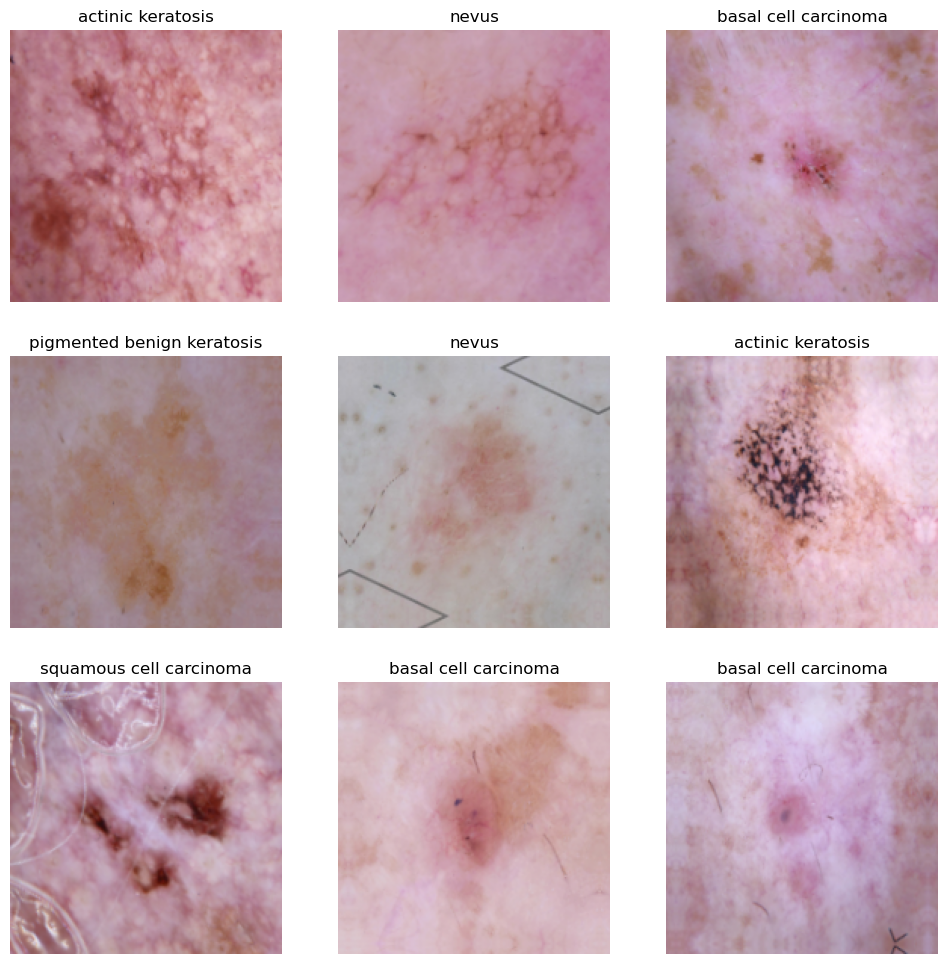

In [46]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [48]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

### Compiling the model

In [49]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [50]:
## Your code goes here, note: train your model for 20 epochs
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
70/70 [==============================] - 38s 509ms/step - loss: 2.0340 - accuracy: 0.2523 - val_loss: 2.1918 - val_accuracy: 0.2373
Epoch 2/5
70/70 [==============================] - 35s 495ms/step - loss: 1.7566 - accuracy: 0.3720 - val_loss: 2.0876 - val_accuracy: 0.3051
Epoch 3/5
70/70 [==============================] - 35s 502ms/step - loss: 1.5484 - accuracy: 0.4493 - val_loss: 2.2700 - val_accuracy: 0.3729
Epoch 4/5
70/70 [==============================] - 35s 500ms/step - loss: 1.4199 - accuracy: 0.5069 - val_loss: 2.2862 - val_accuracy: 0.3136
Epoch 5/5
70/70 [==============================] - 35s 500ms/step - loss: 1.3593 - accuracy: 0.5190 - val_loss: 2.1396 - val_accuracy: 0.3898


### Visualizing the results

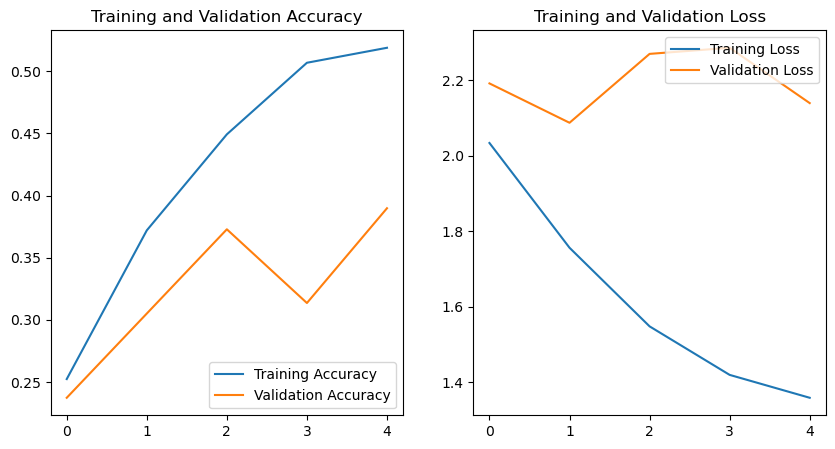

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

This model like underfiting beacuse 

`Traning accuracy = 51 ` and 

`Validation accuracy = 38 `

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [55]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [78]:
data_dir_train = pathlib.Path(r"C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train")


In [64]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [66]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))


In [67]:
count

[114, 376, 95, 438, 357, 462, 77, 181, 139]

<BarContainer object of 9 artists>

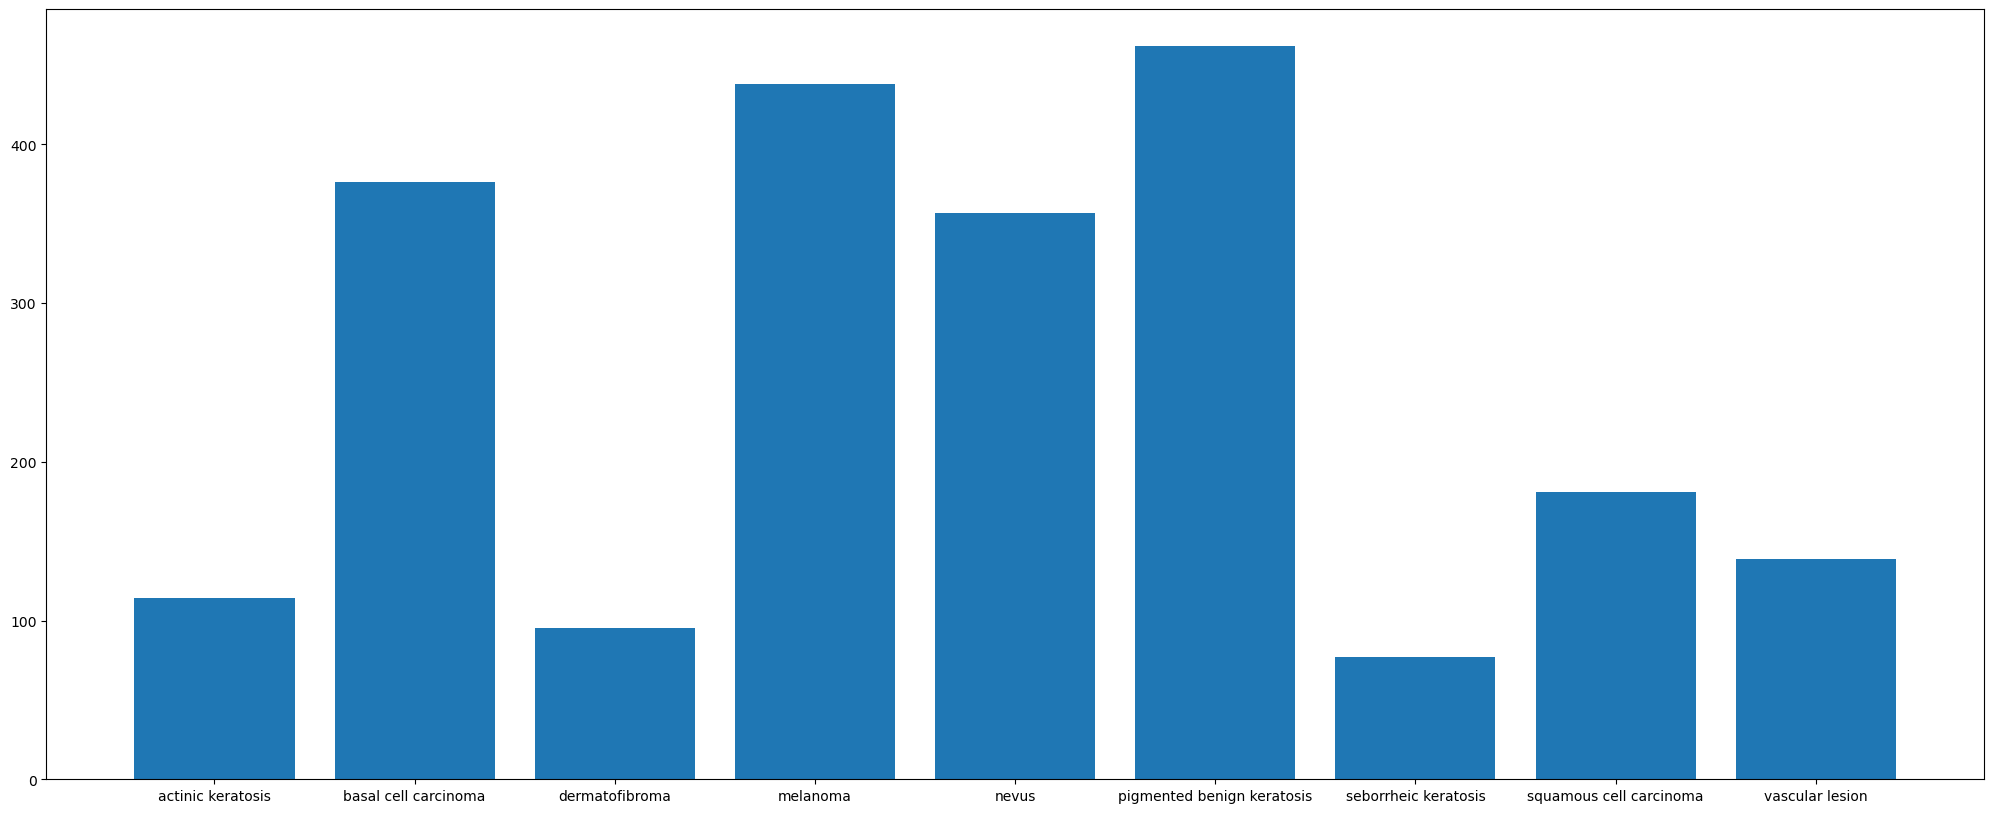

In [70]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [71]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [98]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A0C1A721F0>: 100%|█| 500/500 [00:03<00:00, 146.36 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A0C1BE5280>: 100%|█| 500/500 [00:03<00:00, 153.47 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A0C1BDD1F0>: 100%|█| 500/500 [00:03<00:00, 152.35 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A0C1BB43D0>: 100%|█| 500/500 [00:16<00:00, 30.07 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A0977BB070>: 100%|█| 500/500 [00:15<00:00, 32.56 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A0858B07C0>: 100%|█| 500/500 [00:03<00:00, 131.35 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A0C1DA2A60>: 100%|█| 500/500 [00:08<00:00, 58.15 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A0C19F4820>: 100%|█| 500/500 [00:03<00:00, 134.08 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Users\user\OneDrive\Desktop\Deep Learning\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A083D85100>: 100%|█| 500/500 [00:03<00:00, 134.83 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [99]:
#Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. 
#Lets take a look at total count of augmented images.

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


#### Lets see the distribution of augmented data after adding new images to the original training data.


<BarContainer object of 9 artists>

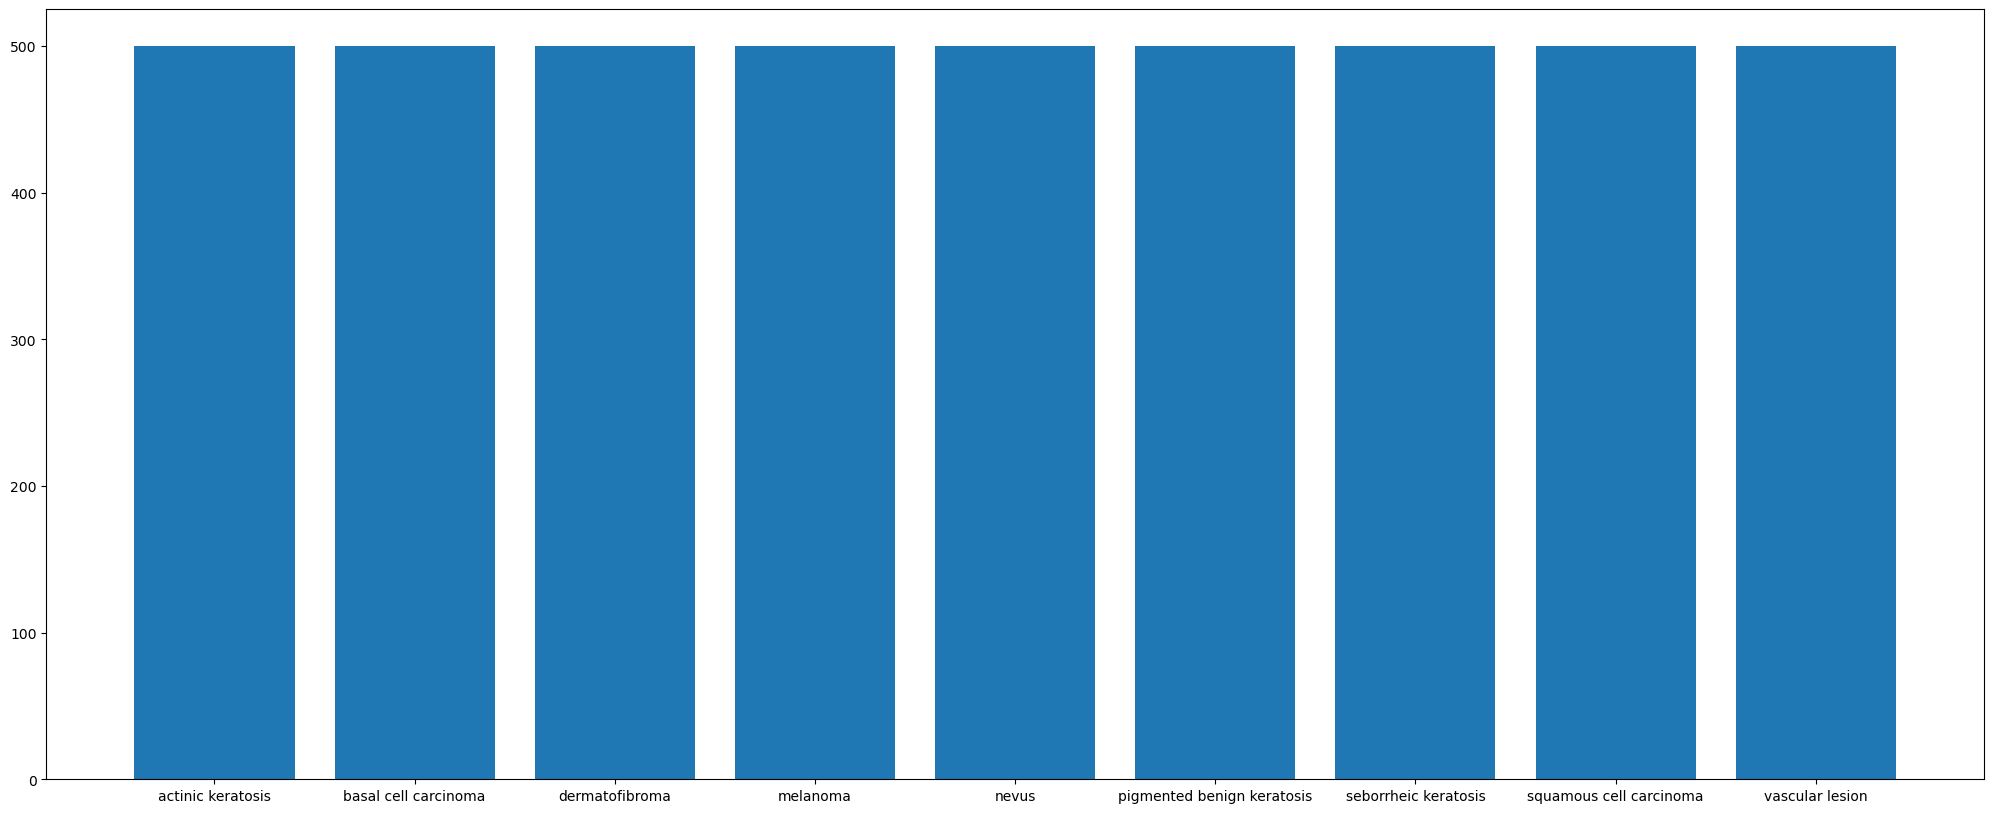

In [100]:
# Check the distribution of data again. 
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [107]:
import os
from glob import glob

In [113]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\user\\OneDrive\\Desktop\\Deep Learning\\Project\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0182fce3-efd0-45a5-b6a5-307413ce243e.jpg',
 'C:\\Users\\user\\OneDrive\\Desktop\\Deep Learning\\Project\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_21419686-7e06-4279-a219-edf80e606605.jpg',
 'C:\\Users\\user\\OneDrive\\Desktop\\Deep Learning\\Project\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2d6963fc-8fd1-4066-a4d7-ef8f599df354.jpg',
 'C:\\Users\\user\\OneDrive\\Desktop\\Deep Learning\\Project\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4332bcc6-b75b-4d4a-9ef1-4bffedea2d6b.jpg',
 'C:\\Users\\use

In [109]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [114]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [115]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [116]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\user\AppData\Local\Temp\ipykernel_8560\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [117]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [118]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [119]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [120]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [121]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [123]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [124]:
epochs = 15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
169/169 [==============================] - 85s 392ms/step - loss: 1.7765 - accuracy: 0.3253 - val_loss: 1.4211 - val_accuracy: 0.4640
Epoch 2/15
169/169 [==============================] - 60s 354ms/step - loss: 1.3658 - accuracy: 0.4974 - val_loss: 1.2279 - val_accuracy: 0.5405
Epoch 3/15
169/169 [==============================] - 56s 332ms/step - loss: 1.1204 - accuracy: 0.5864 - val_loss: 1.1006 - val_accuracy: 0.6192
Epoch 4/15
169/169 [==============================] - 60s 355ms/step - loss: 0.9075 - accuracy: 0.6786 - val_loss: 0.9068 - val_accuracy: 0.6867
Epoch 5/15
169/169 [==============================] - 57s 337ms/step - loss: 0.7345 - accuracy: 0.7409 - val_loss: 0.8675 - val_accuracy: 0.7120
Epoch 6/15
169/169 [==============================] - 58s 343ms/step - loss: 0.5584 - accuracy: 0.8103 - val_loss: 0.8806 - val_accuracy: 0.7023
Epoch 7/15
169/169 [==============================] - 61s 364ms/step - loss: 0.4537 - accuracy: 0.8399 - val_loss: 0.8229 - val_ac

#### **Todo:**  Visualize the model results

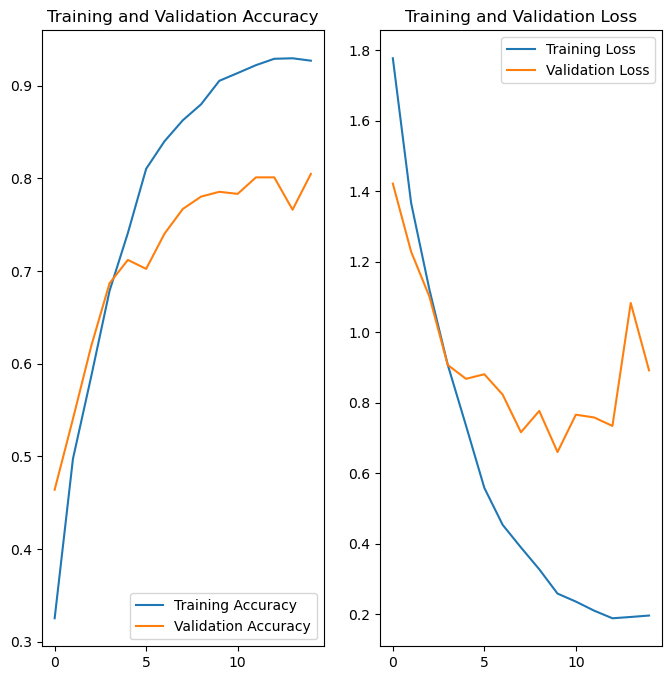

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This is good 

`Traning Accuracy = 92`

`Validation Accuracy = 80 `

thats good 